In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import mcu
import swiss_roll_dataset_generator as roll_gen
import dataset_generator


In [8]:
figure_num = 200
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level=0
lw = np.array([1, 1])
up = np.array([10, 10])
param_names = np.array(["c1", "c2"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, roll_gen.generate_swiss_roll, noise_level=noise_level, min_num_points=figure_point_cnt)
k = 6
c = 1e5
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, figures, k)

q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)


/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.1404243040605064


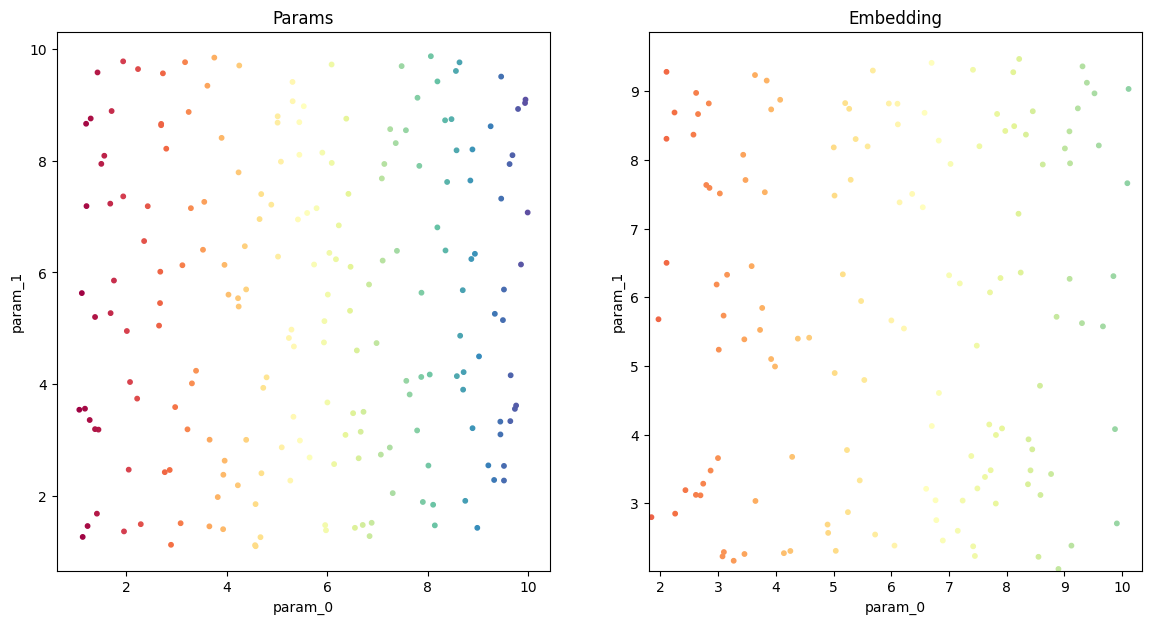

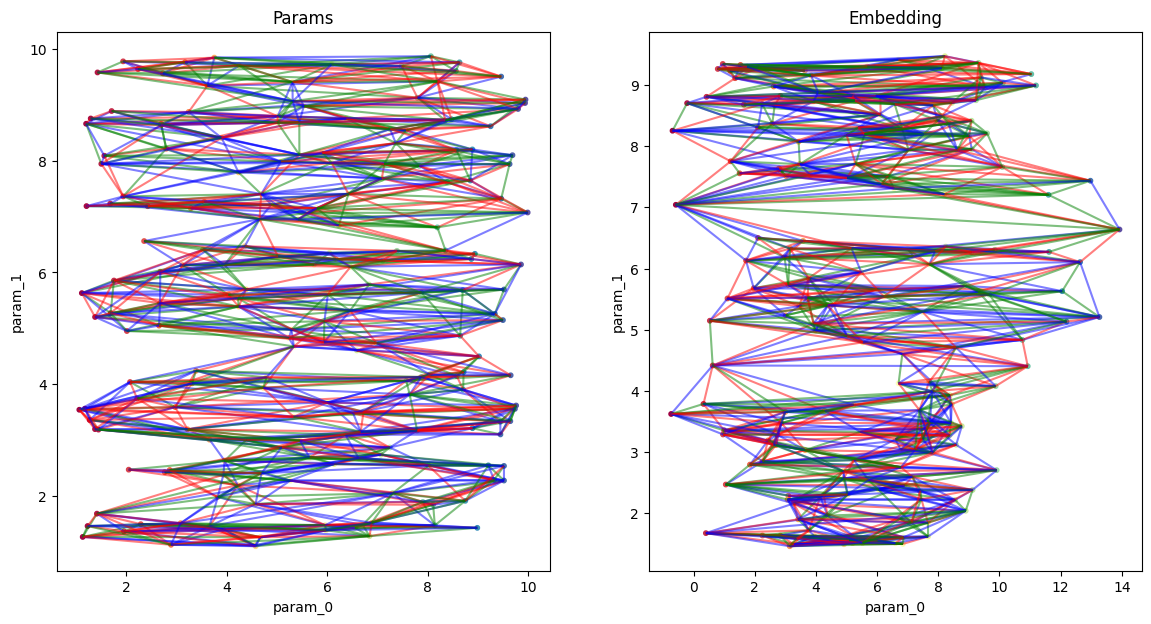

In [9]:
ld_embedding = mcu.reduce_dimensions(q, p)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, control_vars)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars)
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, edges=edges)

In [11]:
pieces_cnt = 10
test_data_size = 20
noise_level = 0.1
interval_runs, intervals = mcu.test_predictive_optimization(lw, up, p, k, roll_gen.generate_swiss_roll, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = False)


-----------
x_opt  = [3.36238991 1.97538582], x_err = 906.8313747088275
x_real = [1.79351744 1.66489351]
-----------
x_opt  = [3.05419934 1.97538582], x_err = 1119.8884459808244
x_real = [1.07778957 1.53021943]
-----------
x_opt  = [3.26400119 1.97538582], x_err = 570.0792562627994
x_real = [1.28892333 1.73271248]
-----------
x_opt  = [3.40927606 1.97538582], x_err = 638.8921218186756
x_real = [1.58172644 1.72936078]
-----------
x_opt  = [3.01579353 1.97538582], x_err = 1273.349845376854
x_real = [1.22844248 1.50372738]
-----------
x_opt  = [3.24625829 1.97538582], x_err = 1248.628888233642
x_real = [1.81991876 1.12911621]
-----------
x_opt  = [2.8702741  1.97538582], x_err = 1337.3735885894193
x_real = [1.52278066 1.2060792 ]
-----------
x_opt  = [2.91214435 1.97538582], x_err = 1274.7994290388574
x_real = [1.1769166  1.37627465]
-----------
x_opt  = [3.10708889 1.97538582], x_err = 758.7327185318475
x_real = [1.18469869 1.04736304]
-----------
x_opt  = [3.2781202  1.97538582], x_err 

TypeError: only integer scalar arrays can be converted to a scalar index

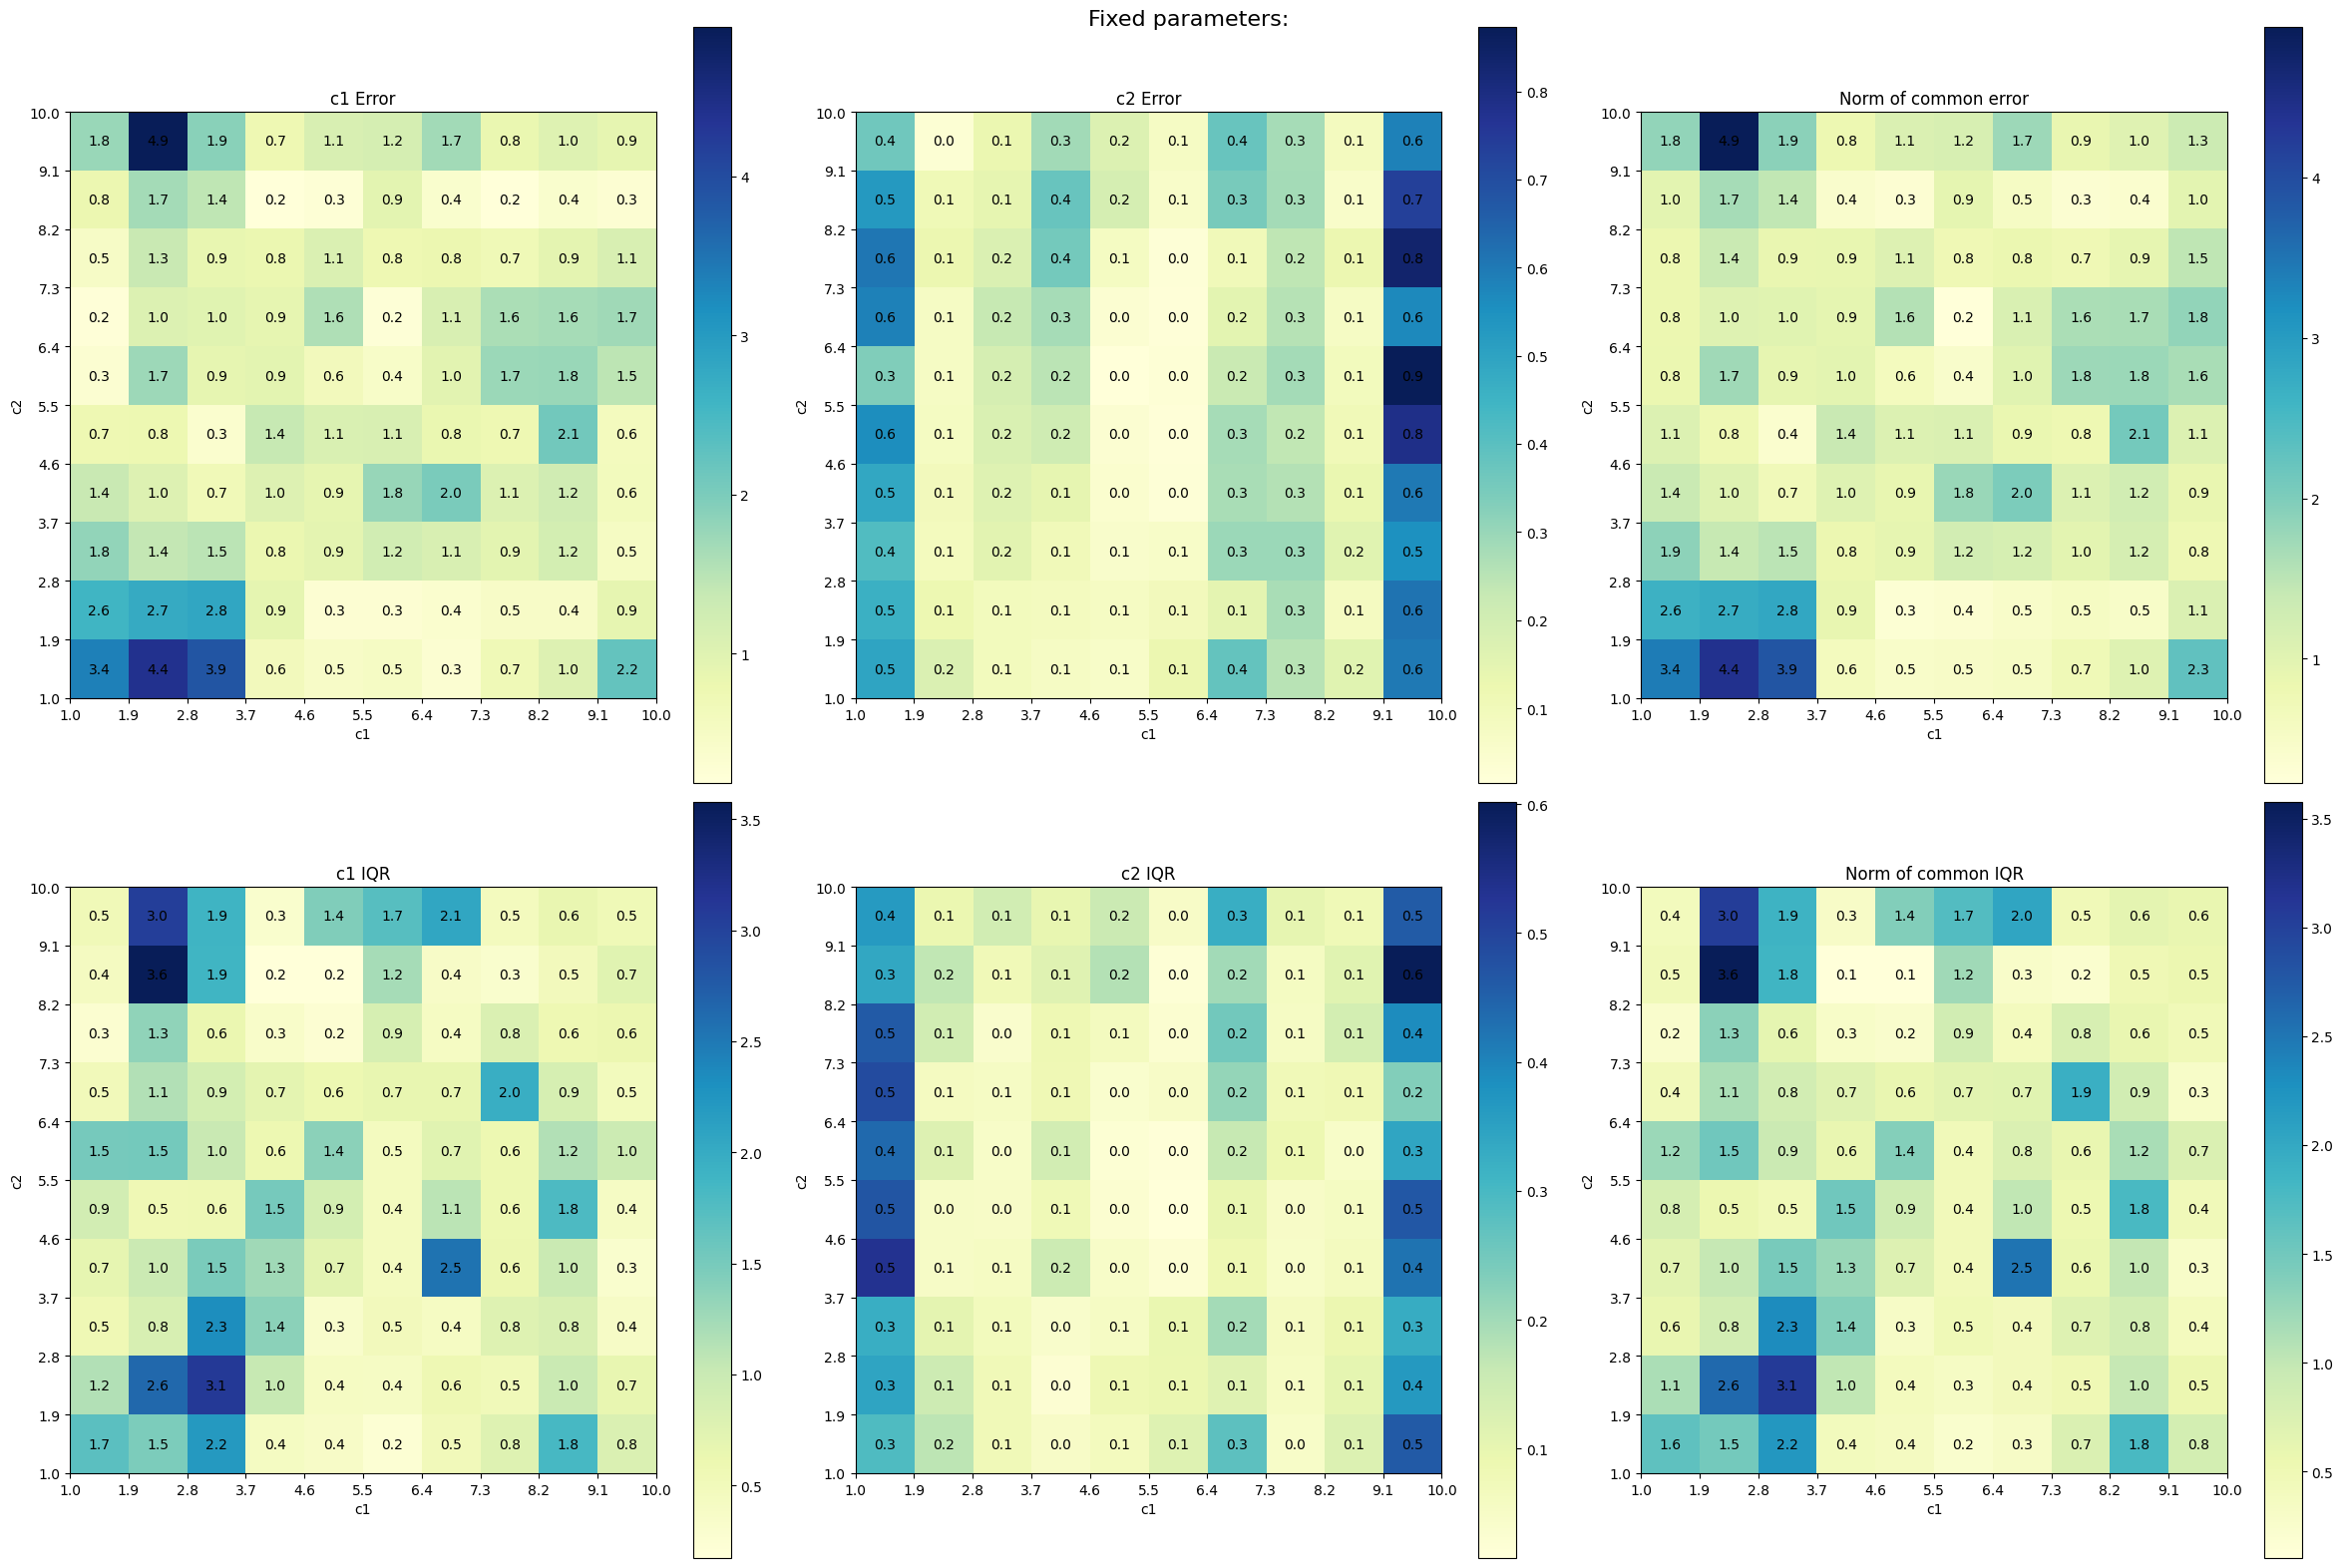

In [13]:
lw = np.array([1, 1])
up = np.array([10, 10])
param_names = np.array(["c1", "c2"])
mcu.plot_2d_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs, p, all_param_names=param_names, intervals=intervals)
